##<div style="direction:ltr;text-align:left;font-family:Arial, Tahoma">Bitwise Operations and Image Masking</div>


<div style="direction:ltr;text-align:left;font-family:Arial, Tahoma"> In the first step, we will create shapes to understand these operations. <br/> For now, don’t worry about drawing shapes in OpenCV; in the next section and the notebook at the link below, it will be fully explained: </div>

07-Drawing-and-annotating.ipynb

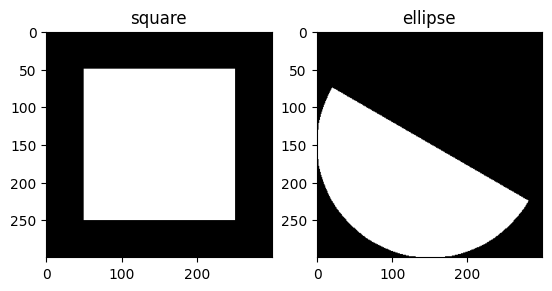

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# If you're wondering why only two dimensions, well this is a grayscale image,
# if we doing a colored image, we'd use
# rectangle = np.zeros((300, 300, 3),np.uint8)

# Making a sqare
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -1)

# Making a ellipse
ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)

#show
plt.subplot(121);plt.imshow(square,cmap='gray');plt.title("square");
plt.subplot(122);plt.imshow(ellipse,cmap='gray');plt.title("ellipse");


Draws a **filled rectangle** on an image.

- **`square`**: target image or mask  
- **`(50, 50)`**: top-left corner  
- **`(250, 250)`**: bottom-right corner  
- **`255`**: white color (grayscale)  
- **`-1`**: fills the rectangle completely  


Draws a **filled ellipse (half-ellipse)** on an image using OpenCV.

- **`ellipse`**: target image or mask  
- **`(150, 150)`**: center of the ellipse  
- **`(150, 150)`**: lengths of the major and minor axes  
- **`30`**: rotation angle of the ellipse (in degrees)  
- **`0`**: starting angle of the arc  
- **`180`**: ending angle of the arc (draws half of the ellipse)  
- **`255`**: white color (grayscale)  
- **`-1`**: fills the ellipse completely  

This is commonly used to create **filled shapes or masks**.


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Bitwise operations on images in OpenCV</div>
<ul>
    <li>bitwise_and</li>
    <li>bitwise_or</li>
    <li>bitwise_xor</li>
    <li>bitwise_not</li>
</ul>

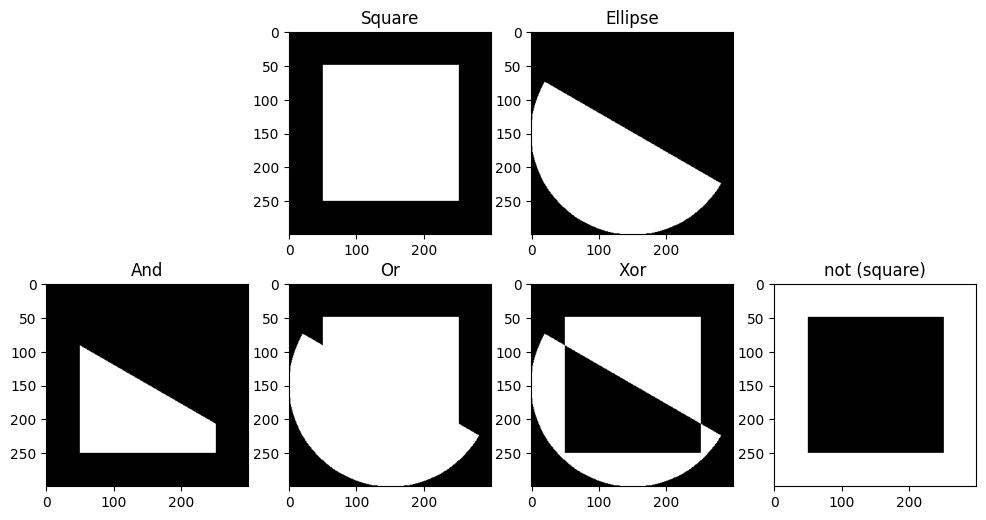

In [2]:
# Shows only where they intersect
bitwise_and = cv2.bitwise_and(square, ellipse)

# Shows where either square or ellipse is
bitwise_or = cv2.bitwise_or(square, ellipse)


# Shows where either exist by itself
bitwise_xor = cv2.bitwise_xor(square, ellipse)


# Shows everything that isn't part of the square
bitwise_not_sq = cv2.bitwise_not(square)

#show
plt.figure(figsize=[12,6])
plt.subplot(242);plt.imshow(square,cmap='gray');plt.title("Square");
plt.subplot(243);plt.imshow(ellipse,cmap='gray');plt.title("Ellipse");
plt.subplot(245);plt.imshow(bitwise_and,cmap='gray');plt.title("And");
plt.subplot(246);plt.imshow(bitwise_or,cmap='gray');plt.title("Or");
plt.subplot(247);plt.imshow(bitwise_xor,cmap='gray');plt.title("Xor");
plt.subplot(248);plt.imshow(bitwise_not_sq,cmap='gray');plt.title("not (square)");


## Bitwise Operations in Mathematical Notation

- **AND (∧)**: \( A \& B \)  
  Keeps only pixels where **both** \( A \) and \( B \) are white (intersection).  
  $$
  I_{\text{AND}}(x, y) = A(x, y) \wedge B(x, y)
  $$

- **OR (∨)**: \( A \mid B \)  
  Keeps pixels where **either** \( A \) or \( B \) is white (union).  
  $$
  I_{\text{OR}}(x, y) = A(x, y) \vee B(x, y)
  $$

- **XOR (⊕)**: \( A \oplus B \)  
  Keeps pixels where **only one** of \( A \) or \( B \) is white.  
  $$
  I_{\text{XOR}}(x, y) = A(x, y) \oplus B(x, y)
  $$

- **NOT (¬)**: \( \neg A \)  
  Inverts the image, turning black to white and white to black.  
 $$
  I_{\text{NOT}}(x, y) = \neg A(x, y)
  $$

These operations are widely used in **masking, compositing, and image processing**.


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Practical example with a color image</div>


(np.float64(-0.5), np.float64(449.5), np.float64(249.5), np.float64(-0.5))

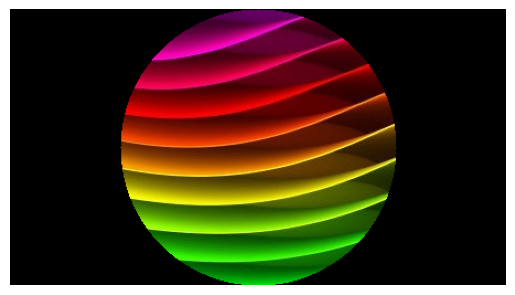

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/alpha.jpg')
cropped = image[100:600, 150:650]

h, w = cropped.shape[:2]

mask = np.zeros((h, w), np.uint8)
cv2.circle(mask, (w//2, h//2), min(h, w)//2, 255, -1)

output_image = cv2.bitwise_and(cropped, cropped, mask=mask)

plt.imshow(output_image[..., ::-1])
plt.axis("off")


In [ ]:
png_image = np.zeros((500,500,4), np.uint8)
png_image[:,:,0:3] = cropped
circle = np.zeros((500,500), np.uint8)
cv2.circle(circle, (250, 250), 250, (255,255,255), -1)
png_image[:,:,3]= circle
cv2.imwrite("caw.png", png_image)

True

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> To understand the bitwise operator, pay attention to the following example with two images.</div>


In [13]:
square = np.zeros((10, 10), np.uint8)
cv2.rectangle(square, (2, 2), (8, 8), 2, -1) # 2 : 010

circle1 = np.zeros((10, 10), np.uint8)
cv2.circle(circle1, (5, 5), 2, 3, -1)  # 3 : 011


circle2 = np.zeros((10, 10), np.uint8)
cv2.circle(circle2, (5, 5), 2, 4, -1) # 4 : 100


output1 = cv2.bitwise_and(square, circle1)
output2 = cv2.bitwise_and(square, circle2)

print("--square--")
print(square)
print("--circle1--")
print(circle1)
print("--circle2--")
print(circle2)
print("--output1--")
print(output1)
print("--output2--")
print(output2)


--square--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 0 0 0 0 0 0 0 0]]
--circle1--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 3 3 3 0 0 0]
 [0 0 0 3 3 3 3 3 0 0]
 [0 0 0 0 3 3 3 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--circle2--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 4 4 4 0 0 0]
 [0 0 0 4 4 4 4 4 0 0]
 [0 0 0 0 4 4 4 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--output1--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 2 2 0 0 0]
 [0 0 0 2 2 2 2 2 0 0]
 [0 0 0 0 2 2 2 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--output2--
[[0 0 0 0 0 0 0 0